von Fabian Wolter und Selin Kabak
# Kalibrierung und Einsatz eines
# Infrarot-Entfernungsmessers
### Versuch 1, Praktikum Signale, Systeme und Sensoren

TODO (1)
: Erstellen Sie eine Python-Funktion, welche die Daten aus der Datei einliest 
(verwenden Sie dazu die Numpy-Funktion genfromtxt()), von den Daten die ersten 
1000 Werte überspringt und aus den nächsten Werten (nehmen Sie eine sinnvolle 
Anzahl von Messungen) den Mittelwert und die Standardabweichung berechnet 
(der Einschwingvorgang wird dadurch ignoriert). Vergleichen Sie die Ergebnisse 
mit den Werten aus Ihrer gemessenen Tabelle. Stellen Sie die gefundene 
Übertragungsfunktion bzw. Kennlinie im Notebook graphisch mit Python bzw. Matplotlib dar. 

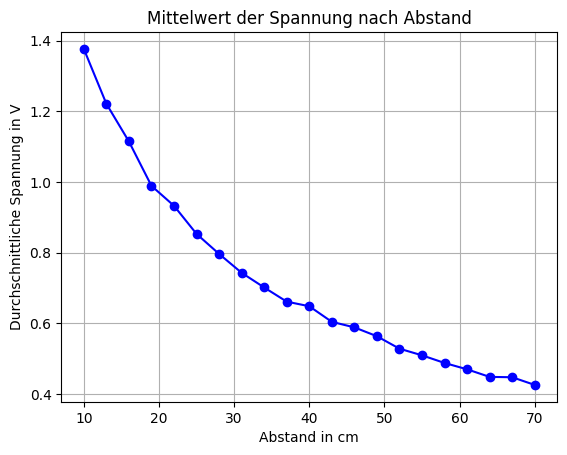

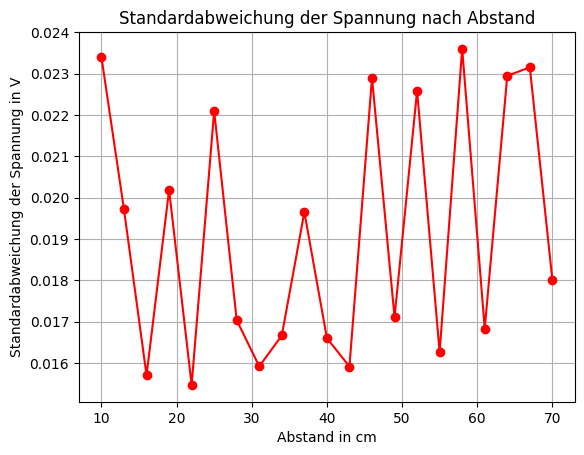

In [31]:
import numpy as np
import os
import matplotlib.pyplot as plt

def processData(file_path, skip_header=1000):
    try:
        data = np.genfromtxt(
            file_path, 
            delimiter=';', 
            skip_header=skip_header,  
            usecols=[1], 
            converters={1: lambda s: float(s.decode('utf-8').replace(',', '.'))}
        )
        mean = np.mean(data)
        std = np.std(data)
        return mean, std
    except Exception:
        print(f"Fehler beim Einlesen")

directory = '/home/selin/HTWG-AIN/AIN3/sss/versuch1/data/'
distance = np.arange(10, 73, 3)

means = []
std_devs = []

for dist in distance:
    file_path = os.path.join(directory, f'{dist}cm.csv')
    mean, std = processData(file_path)
    
    if mean is not None and std is not None:
        means.append(mean)
        std_devs.append(std)
    else:
        means.append(None)  # Fehlende Werte für fehlende Dateien
        std_devs.append(None)

plt.figure()
plt.plot(distance, means, 'bo-', label='Mittelwert')
plt.xlabel('Abstand in cm')
plt.ylabel('Durchschnittliche Spannung in V')
plt.title('Mittelwert der Spannung nach Abstand')
plt.grid(True)
plt.show()

plt.figure()
plt.plot(distance, std_devs, 'ro-', label='Standardabweichung')
plt.xlabel('Abstand in cm')
plt.ylabel('Standardabweichung der Spannung in V')
plt.title('Standardabweichung der Spannung nach Abstand')
plt.grid(True)
plt.show()

### Probleme
`Fehler beim Einlesen der Datei /home/selin/HTWG-AIN/AIN3/sss/versuch1/data/70.csv: a bytes-like object is required, not 'str'` <br>
`Fehler beim Finden mancher Dateien`

TODO (2)
: Um den Sensor als Abstandsmesser benutzen zu können, brauchen wir eine Umrechnungsvorschrift,
mit der wir aus den gemessenen Spannungswerten die zugehörigen Entfernungswerte
berechnen können. Die in der Vorlesung vorgestellte Methode der linearen Regression funktioniert
für den Sharp-Sensor nicht, da es sich hier eindeutig um einen Sensor mit nicht linearer
Kennlinie handelt. Es gibt aber einen einfachen, häufig eingesetzten Trick, mit dem sich die
lineare Regression auch bei allgemeinen nicht linearen Kennlinien der Form <br>
$y = x^a$ <br>
anwenden lässt: statt die Regression direkt auf den Werten x und y zu berechnen, werden
Eingangs- und Ausgangswerte zunächst logarithmiert, d.h. wir erhalten neue Paare aus
Eingangs- und Ausgangswerten $x′$ und $y′$ mit $y′ = ln y$ und $x′ = ln x$ bzw. umgekehrt $x = e^{x′}$. <br>
Setzt man beides in die Kennlinie ein, so ergibt sich <br>
$y′ = ln y = ln(x^a) = a \cdot ln x = a \cdot ln(e^{x′}) = a \cdot x′$ <br>
d.h. nach der doppelten Logarithmierung ist die Kennlinie eine Gerade mit Steigung a. Die
Parameter dieser Gerade können wir wiederum mit der linearen Regression schätzen.

1. Logarithmieren Sie zunächst alle Eingangs- und Ausgangswerte in der Tabelle und
stellen den Zusammenhang graphisch dar. 
2. Die resultierende Kennlinie sollte die Form einer Geraden haben. 
3. Berechnen Sie mithilfe der linearen Regression, wie in der Vorlesung behandelt, die
Ausgleichsgerade in Python. Eliminieren Sie ggf. Werte für sehr große Entfernungen,
für die der lineare Zusammenhang nicht mehr gilt. Achtung: die lineare Regression soll
von Ihnen selbst in Python nach den Formeln aus der Vorlesung implementiert werden,
eine Verwendung vorgefertigter Lösungen (z.B. in scipy) ist hier nicht vorgesehen. 

Sie erhalten aus der Regression die Parameter a und b für den Zusammenhang <br>
$y′ = a \cdot x′ + b$. <br>
Die Rückrechnung auf den ursprünglichen Zusammenhang geschieht über die Umkehrung
der doppelten Logarithmierung:
$y = exp(a \cdot ln x + b) = e^b \cdot x^a$, <br>
wobei x hier die Spannungsmessung und y die daraus resultierende Abstandsmessung darstellt.
Damit haben wir die nicht lineare Kennlinie des Sensors gefunden.

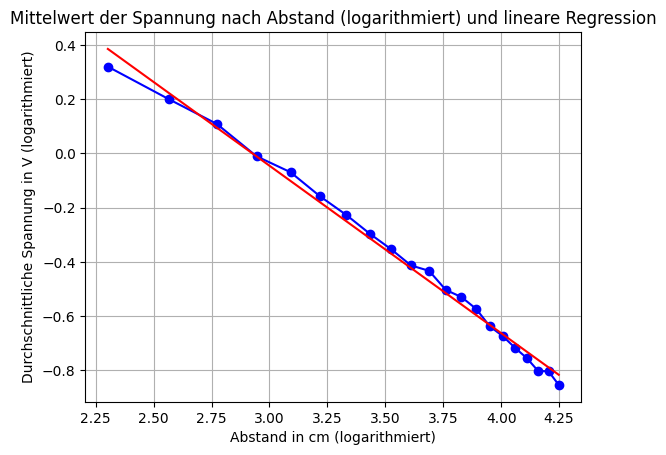

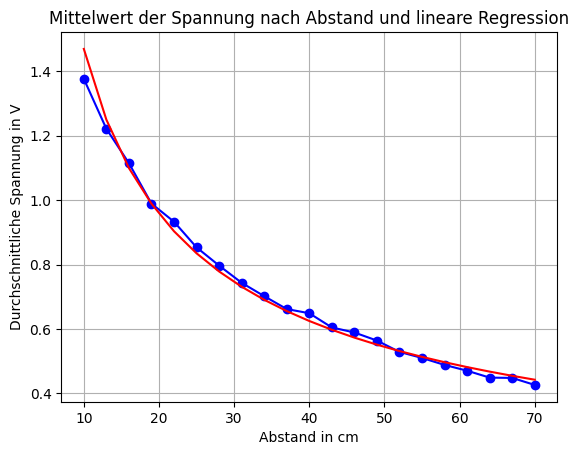

In [32]:
#----- Logarithmize the data -----#
logmeans = np.log(means)
logdistance = np.log(distance)    

#----- Calculate linear regression -----#
def linear_regression(x, y):
    mean_x = np.mean(x)
    mean_y = np.mean(y)
    m = np.sum((x - mean_x) * (y - mean_y)) / np.sum((x - mean_x)**2)
    b = mean_y - m * mean_x
    return m, b

#----- Calculate parameters for linear regression -----#
m, b = linear_regression(logdistance, logmeans)

plt.figure()
plt.plot(logdistance, logmeans, 'bo-', label='Mittelwert logarithmiert')
plt.plot(logdistance, m*logdistance + b, 'r-', label='Lineare Regression')
plt.xlabel('Abstand in cm (logarithmiert)')
plt.ylabel('Durchschnittliche Spannung in V (logarithmiert)')
plt.title('Mittelwert der Spannung nach Abstand (logarithmiert) und lineare Regression')
plt.grid(True)
plt.show()

plt.figure()
plt.plot(distance, means, 'bo-', label='Mittelwert')
plt.plot(distance, np.exp(m*logdistance + b), 'r-', label='Lineare Regression')
plt.xlabel('Abstand in cm')
plt.ylabel('Durchschnittliche Spannung in V')
plt.title('Mittelwert der Spannung nach Abstand und lineare Regression')
plt.grid(True)
plt.show()

TODO (3)
: <br>
a. <br> Ermittlung des Messfehlers des Abstandsmessers: Die Kombination aus Sharp-Sensor,
Oszilloskop und der gefundenen Kennlinie stellt eine Messeinrichtung für den Abstand
eines Objektes dar. Durch die Kennlinie wird der Abstand nicht direkt ermittelt, sondern
indirekt über eine Spannungsmessung. Zur Ermittlung des Messfehlers müssen wir also die
Fehlerfortpflanzung durch die Kennlinie $e^bx^a$ berechnen.
Vorgehensweise:
1. Stellen Sie das Zielobjekt im Abstand eines DIN-A4-Blattes (lange Seite) vom Sensor auf
und führen Sie eine einzige Messung aus und speichern Sie das Resultat als csv-Datei.
2. Schätzen Sie den Messfehler nach der Methode aus der Vorlesung. Vergessen Sie
dabei nicht eine eventuelle Korrektur aufgrund der Anzahl von Messungen. Geben
Sie das Ergebnis Ihrer Spannungsmessung in der korrekten Form an. Wie groß ist der
Vertrauensbereich für eine Sicherheit von 68 %, wie groß für eine Sicherheit von 95 %?
3. Geben Sie nun das Ergebnis Ihrer Abstandsmessung in cm in korrekter Form an.
Benutzen Sie dazu die Fehlerfortpflanzung. <br>

b. <br> Flächenmessung: Zur Ermittlung der Fläche eines DIN A4-Blattes messen Sie nun nach
derselben Methode wie in Aufgabe 3a die Breite des Blattes aus. Berechnen Sie daraus
Ihre Schätzung für die Fläche des Blattes und geben Sie Ihr Messergebnis korrekt mit Ihrer
Schätzung des Messfehlers an. Benutzen Sie dazu das Gaußsche Fehlerfortpflanzungsgesetz
aus der Vorlesung.

In [43]:
# 21cm -> 916,1 mV
file_path_breit = '/home/selin/HTWG-AIN/AIN3/sss/versuch1/data/dina4breit.csv'
# 29,7cm -> 741,1 mV
file_path_lang = '/home/selin/HTWG-AIN/AIN3/sss/versuch1/data/dina4lang.csv'

#----- Calculate mean and standard deviation -----# 
mean_breit, emp_std_breit = processData(file_path_breit)
mean_lang, emp_std_lang = processData(file_path_lang)

regression = np.exp(m*logdistance + b)

#----- Calculate width and length -----# 
breite_r = mean_breit - regression
breite = np.interp(0, breite_r, distance)
delta_breit_68 = 1.03 * emp_std_breit * breite
delta_breit_95 = 2.09 * emp_std_breit * breite

laenge_r = mean_lang - regression
laenge = np.interp(0, laenge_r, distance)
delta_lang_68 = 1.03 * emp_std_lang * laenge
delta_lang_95 = 2.09 * emp_std_lang * laenge

print(f"Breite: {breite} cm ± {abs(delta_breit_68)} cm für eine Sicherheit von 68% oder ± {abs(delta_breit_95)} cm für eine Sicherheit von 95%")
print(f"Länge: {laenge} cm ± {abs(delta_lang_68)} cm für eine Sicherheit von 68% oder ± {abs(delta_lang_95)} cm für eine Sicherheit von 95%")

#----- Calculate area -----#
flaeche = breite * laenge
flaeche_fehler_68 = np.abs(np.sqrt((delta_breit_68 * breite)**2 + (delta_lang_68 * laenge)**2))
flaeche_fehler_95 = np.abs(np.sqrt((delta_breit_95 * breite)**2 + (delta_lang_95 * laenge)**2))
print(f"Fläche: {flaeche} cm^2 ± {flaeche_fehler_68} cm^2 für eine Sicherheit von 68% oder ± {flaeche_fehler_95} cm^2 für eine Sicherheit von 95%")

#----- Calculate 68% and 95% confidence intervals for width -----#
conf_68_breit = [breite - delta_breit_68, breite + delta_breit_68]
conf_95_breit = [breite - delta_breit_95, breite + delta_breit_95]

#----- Calculate 68% and 95% confidence intervals for length -----#
conf_68_lang = [laenge - delta_lang_68, laenge + delta_lang_68]
conf_95_lang = [laenge - delta_lang_95, laenge + delta_lang_95]

#----- Calculate 68% and 95% confidence intervals for area -----#
conf_68_flaeche = [flaeche - flaeche_fehler_68, flaeche + flaeche_fehler_68]
conf_95_flaeche = [flaeche - flaeche_fehler_95, flaeche + flaeche_fehler_95]

print(f"68% Vertrauensbereich für Breite: {conf_68_breit}")
print(f"95% Vertrauensbereich für Breite: {conf_95_breit}")
print(f"68% Vertrauensbereich für Länge: {conf_68_lang}")
print(f"95% Vertrauensbereich für Länge: {conf_95_lang}")
print(f"68% Vertrauensbereich für Fläche: {conf_68_flaeche}")
print(f"95% Vertrauensbereich für Fläche: {conf_95_flaeche}")

Breite: 21.554101794309876 cm ± 0.5017366037621351 cm für eine Sicherheit von 68% oder ± 1.0180868950124877 cm für eine Sicherheit von 95%
Länge: 30.36135469240925 cm ± 0.5431004810478428 cm für eine Sicherheit von 68% oder ± 1.1020194227087294 cm für eine Sicherheit von 95%
Fläche: 654.4117296533368 cm^2 ± 19.71925256370257 cm^2 für eine Sicherheit von 68% oder ± 40.01285228945473 cm^2 für eine Sicherheit von 95%
68% Vertrauensbereich für Breite: [21.05236519054774, 22.055838398072012]
95% Vertrauensbereich für Breite: [20.53601489929739, 22.572188689322363]
68% Vertrauensbereich für Länge: [29.818254211361406, 30.904455173457094]
95% Vertrauensbereich für Länge: [29.25933526970052, 31.46337411511798]
68% Vertrauensbereich für Fläche: [634.6924770896343, 674.1309822170393]
95% Vertrauensbereich für Fläche: [614.3988773638821, 694.4245819427915]


### Probleme
`nan error without usecols=(1)`